# Is it Real? Or is it Random?

#### A Financial Turing Test of the JSE

An R/Finance talk by Stuart Reid, Chief Engineer [@NMRQL](http://www.nmrql.com) and Blogger [@TuringFinance](http://www.turingfinance.com)

# BACKGROUND INFORMATION

There is a legend that Professor Burton G. Malkiel, author of [_A Random Walk Down Wall Street_](https://www.amazon.com/Random-Walk-Down-Wall-Street/dp/0393330338), constructed a price chart by flipping a coin and presented it to a world-renowned chartist to analyze. The chartist studied the movements of the fictitious security and exclaimed that it was a textbook pattern and a once-in-a-lifetime opportunity ...

### Can you guess which one is the "coin"?

One line is a jump diffusion process and the other is an asset taken from the JSE Top 40 over a random one-year period

![A Financial Turing Test](http://www.turingfinance.com/wp-content/uploads/2016/11/RealOrRandom2.png "A Financial Turing Test")

## The Random Walk Hypothesis

The [Random Walk Hypothesis](https://en.wikipedia.org/wiki/Random_walk_hypothesis) is a 116-year-old _empirical assumption_ that security prices can be modelled by a random walk, a stochastic process.

The Random Walk Hypothesis is not an economic theory nor is it even an assertion that markets are _literally_ random. It is merely an assumption.

And it is an assumption which lies at the heart of everything we quants hold dear: **risk metrics**, **derivatives**, **mean variance optimization**, even **sharpe ratios!**

It was only in the 1970's that the _empirical assumption_ of randomness was finally justified by an _economic theory_ called the [Efficient Market Hypothesis](https://en.wikipedia.org/wiki/Efficient-market_hypothesis). 

The Nobel-prize worthy Efficient Market Hypothesis explained the Random Walk Assumption using the counter-intuitive lexicon of [Classical Information Theory](https://en.wikipedia.org/wiki/Information_theory).

## Classical Information Theory

Consider the following two binary strings,

* "1111111111111111111111111111111111111..."
* "1101000101001000100010000100110100110..."

Which string contains more information? 

The first string contains almost no information because all of the bits are exactly the same ad infinitum. Knowing one bit is sufficient to know what every other bit will be. 

The first string is called _determinstic_, _predictable_, or simply just _boring_.

The second string contains lots of information because knowing one bit does not seem to be sufficient to know what any other bit will most likely be. 

The second string is called _stochastic_, _unpredictable_, or simply just _interesting_.

## The Efficient Market Hypothesis

The Efficient Market Hypothesis argues that investors trading on new information reflect that informaton into the price of the security thereby making it more random; the Random Walk Hypothesis is a byproduct of participation by many _intelligent_ agents.

The Efficient Market Hypothesis is an _Economic Theory_ because it allows for investors to be reimbursed for taking on risk when they invest in the market. This return, called the market risk premium, is the expected rate of return of a diversified portfolio. This premium explains why buy-and-hold investors and index funds have a non-zero expected return!

So when proponents of the Efficient Market Hypothesis say _"active investors can't beat the market"_ what they really meant to say is that _"active investors can't generate returns above the market risk premium with less risk than the market (a.k.a abnormal returns)"_

## The Three Forms of EMH

The Efficient Market Hypothesis distinguishes between three forms of market efficiency: weak-form, semi-strong-form, and strong-form. These differ according to the set of information, $\Phi$, which is reflected by investors into the price of securities,

* $\Phi_{weak} = \{\textrm{Historical Price Data}\}$
* $\Phi_{semi-strong} = \{\textrm{All Public Information}\}$
* $\Phi_{strong} = \{\textrm{All Information incl. Non-Public}\}$

The Random Walk Hypothesis typically deals with just the first form of market efficiency, but theoretically it could be used to test the hypothesis that the market is efficient with respect to any subset of information, $\Phi_i$. More on that later ...

## Getting to Martingales from EMH

If the current price of a security reflects all historical price data, then the expected return of the market _with respect to_ historical price data is the just yesterday's price,

$E[S_{t+1}|\Phi_{weak}] = S_{t}$ or alternatively,

Let $r = ln\Big(\frac{S_{t+1}}{S_{t}}\Big)$ then,

$E[r_{t+1}|\Phi_{weak}] = ln\Big(\frac{E[S_{t+1}]}{S_{t}}\Big) = ln(S_{t}/S_{t}) = ln(1) = 0$

The above model is called a Martingale and it is the purest type of random walk! But, it does not reflect the equity risk premium ...

## Getting to Submartingales from EMH

If the current price of a security reflects all historical price data, then the expected return of the market _with respect to_ historical price data greater than yesterday's price because securities are _risky_ assets and we should be rewarded for taking on that risk,

$E[S_{t+1}|\Phi_{weak}] \geq S_{t}$ or alternatively,

$E[r_{t+1}|\Phi_{weak}] \geq  0$

This is called a Submartingale random walk and it is the underlying assumption of most quantitative models. The Submartingale Random Walk Hypothesis is a _consequent_ of the Efficient Market Hypothesis which is the _consequent_ of active investment,

$\textbf{Intelligent Investors} \rightarrow \textbf{Efficient Market} \rightarrow \textbf{Random Walks}$

## A Comment on Models

One, often overlooked, aspect of market efficiency is the set of models, $\mathcal{M}$, used by investors. Consider that "random string" we looked at earlier, "1101000101001000100010000100110100110", and now consider the below model:

In [1]:
model <- function(binstr) {
    sum(2^(which(rev(unlist(strsplit(as.character(binstr), "")) == 1))-1))
}
print(model("1101000101001000100010000100110100110"))

[1] 112358132134


Does it look familiar? 1, 1, 2, 3, 5, 8, 13, 21, 34, ... The sequence may look random to our mental model in binary, but to our model above it is decidedly **not random**! Therefore models are an important aspect of market efficiency,

Quantitative investing is the belief that with respect to any set of information, $\Phi_{i}$, and some set of models, $\mathcal{M}$, security prices consist of a _signal component_ and a _noise component_. So for some combinations of $\Phi_{i}$ and $\mathcal{M}$ the market may be totally random, but for some other combinations of $\Phi_{i}$ and $\mathcal{M}$ is may only be semi-random. 

Quantitative investors try to find combinations of $\Phi_{i}$ and $\mathcal{M}$ that reduce the randomness of the security we are trading. We seek information-rich data and build powerful models.

# RANDOMNESS TESTING

## What Kind?

If the markets are random walks, what type of random walk are they? 

Generally speaking you get two types of randomness tests: parametric and nonparametric. 

* Parametric tests assume something about the underlying distribution 
* Nonparametric tests don't assume anything about the underlying distribution

A good test of the random walk hypothesis makes few assumptions about the data ... but may, as a result, be less powerful than another more specific test. 

This, and biases in randomness tests, are the reason why I believe we should ensemble randomness tests together when testing the random walk hypothesis.

## What Frequency?

And if the markets are random walks, are they random in all frequencies?

Most statistical tests of randomness are conducted on returns computed over a specific period of time, usually daily. But just because daily returns are random doesn't automatically imply that weekly or monthly returns are random too.

As such most randomness tests are conducted in multiple frequencies or rather, across multiple lags. Eugene Fama's original paper looked at lags from one to ten days. 

All of these issues are what inspired me to write the emh package for R. This package, which we will be going through shortly, makes it increadibly easy to run a suite of randomness tests on a financial time series object and extract the results of each test in the suite on the data sampled at different frequencies.

# THE RANDOMNESS TESTS

In [2]:
library(emh)

## The Five Types of Randomness Tests

For weak-form market efficiency testing there are five types of randomness tests,

1. Runs - the number of runs or the length of the longest (+) or (-) run
2. Serial correlation - non-zero correlation between an asset and itself
3. Unit roots - the presence of reversion to the trend line after shocks
4. Variance ratios - higher or lower variances at _specific frequencies_
5. Complexity tests - non-computability or compressibility in markets

These are all univariate tests done to determine whether a time series of returns, $r$, is random with respect to itself, $\Phi = r$. Multivariate tests do exist but have, unfortunately, not been applied very often in the context of market efficiency testing ...

## [The Runs Test](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test)

A run is a continuous sequence of either (-)'s - down days - or (+)'s - up days. In the early 1940's Abraham Wald and Jacob Wolfowitz proved that the distribution of the _number of runs_ is for large sample sizes is approximately normally distributed with,

$\mu = \frac{2 N_{+} N_{-}}{N} - 1$ and

$\sigma^2 = \frac{N_{+} N_{-}(2 N_{+} N_{-} - N)}{N^2 (N-1)} = \frac{(\mu - 1)(\mu - 2)}{N - 1}$

where $N_{+}$ is the number of number of +'s and $N_{-}$ is the number of -'s

This test if _nonparametric_ meaning that you can have 90% of your day's being (+) and still test whether or not the sequence was random. This is quite a simple test which was used by Fama in his original papers on market randomness.

## [The Durbin-Waton Test](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

The Durbin-Watson test is named after James Durbin and Geoffrey Watson. It is a test for statistically significant levels of serial correlation in a time series. The Durbin-Watson is conducted on the residuals, $\epsilon$, from a regression analysis on the returns with itself. 

As such, the test does take into account drift ... but only if you assume that drift is stationary and constant. The test can be done on the residuals of a moving average,

$d = \frac{\sum^{\tau}_{t=2}(\epsilon_{t} - \epsilon_{t-1})^2}{\sum^{\tau}_{t=1} \epsilon_{t}^2}$

James Durbin and Geoffrey Watson proved that the distribution of the test statistic $d$ is _asymptotically_ distributed for random walks. 

## [The Ljung-Box Test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test)

The Ljung-Box Test is named after Greta Ljung and George Box. The Ljung-Box test is a test of whether any autocorrelation, $\rho_i$, in a group of autocorrelations computed at lags 1 to $h$ for a time series are significantly different from zero,

$Q = \tau(\tau + 2)\sum^{h}_{k=1}\frac{\hat{\rho}^{2}_{k}}{\tau - k}$

where $\tau$ is the length of the time series and $\hat{\rho}^{2}_{k}$ is the squared autocorrelation calculated with lag equal to $k$. Greta Ljung and George Box proved that the test statistic, $Q$, is asymptotically distributed according to the Chi-Squared distribution.

## [The Breusch-Godfrey Test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test)

The Durbin-Watson Test and the Ljung-Box Test are used very often, however some studies indicate that they are biased toward the null hypothesis. In other words, they are more likely to say that a time series is random than non-random.

The Breusch-Godfrey Test was developed by Trevor S. Breusch and Leslie G. Godfrey and is considered a more powerful test for autocorrelations than either the Durbin-Watson or the Ljung-Box test. The Breusch-Godfrey test also tests for statistically significant autocorrelation in the residuals, $\epsilon$, from a regression analysis.

Breusch and Godfrey proved that if you fit an auxiliary regression to the original data and the lagged residuals from a linear regression the statistic, $n R^{2}$, is asymptotically distributed according to the Chi-Squared distribution,

## Variances at Different Frequencies

Some of the most powerful randomness tests which exist are called Variance Ratio tests. In a random walk process the variance should scale linearly in the sampling interval.

We can express this relationship as the ratio of variances at two different frequencies,

$\sigma^2_{f=1} \approx n \sigma^2_{f=n}$ ... therefore,

$\frac{\sigma^2_{f=1}}{n \sigma^2_{f=n}} \approx 1$

However if there are patterns or cycles in the returns data then the variances will not scale linearly in the sampling interval and the variance ratios will be off.

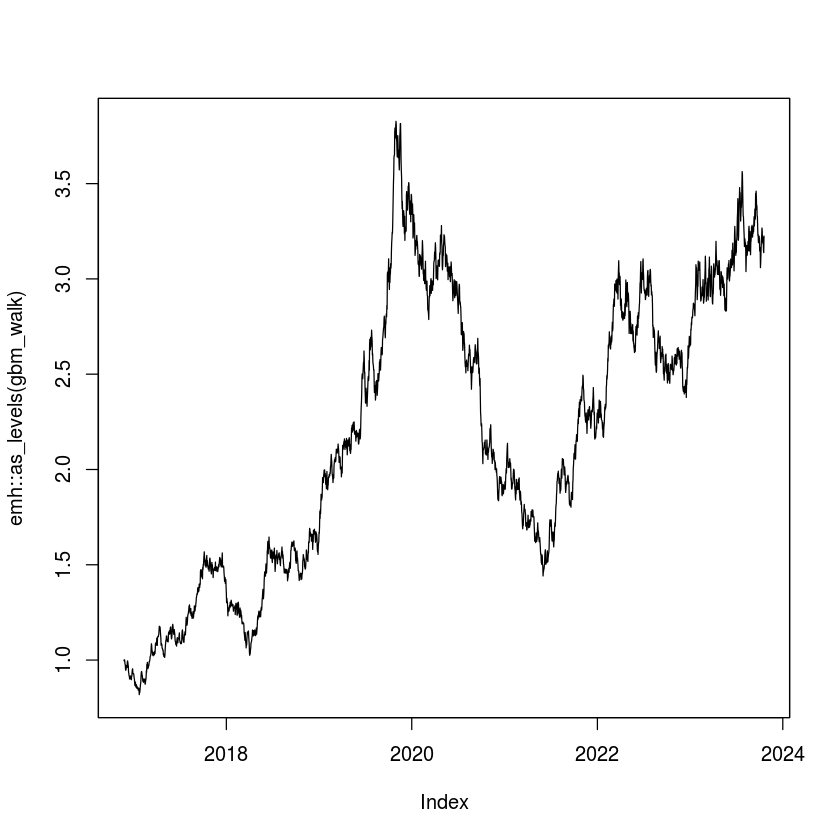

In [3]:
# Let's simulate a simple GBM random walk.
dates <- seq.Date(Sys.Date(), Sys.Date() + 2520, 1)
gbm_walk <- emh::simulate_brownian_motion(n = 2520)
gbm_walk <- zoo::zoo(gbm_walk, dates)
plot(emh::as_levels(gbm_walk))

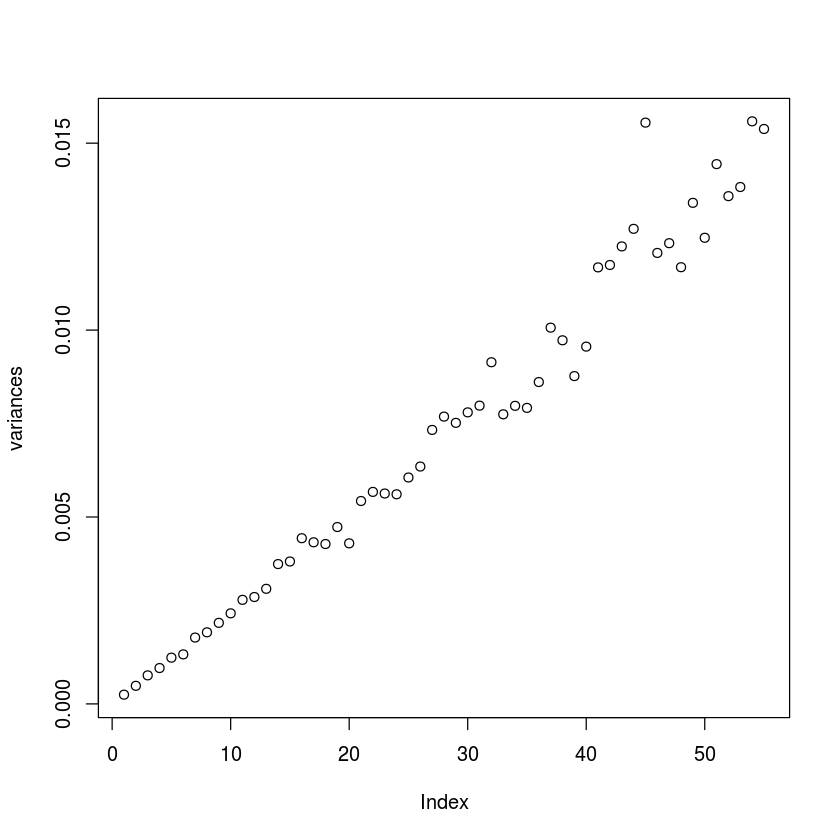

In [4]:
# Now let's print it's variance at different frequencies.
variances <- c()
for(i in 1:55) {
    suppressWarnings(variances <- c(variances,
                                    var(emh::as_frequency(gbm_walk, i)))) 
}
plot(variances)

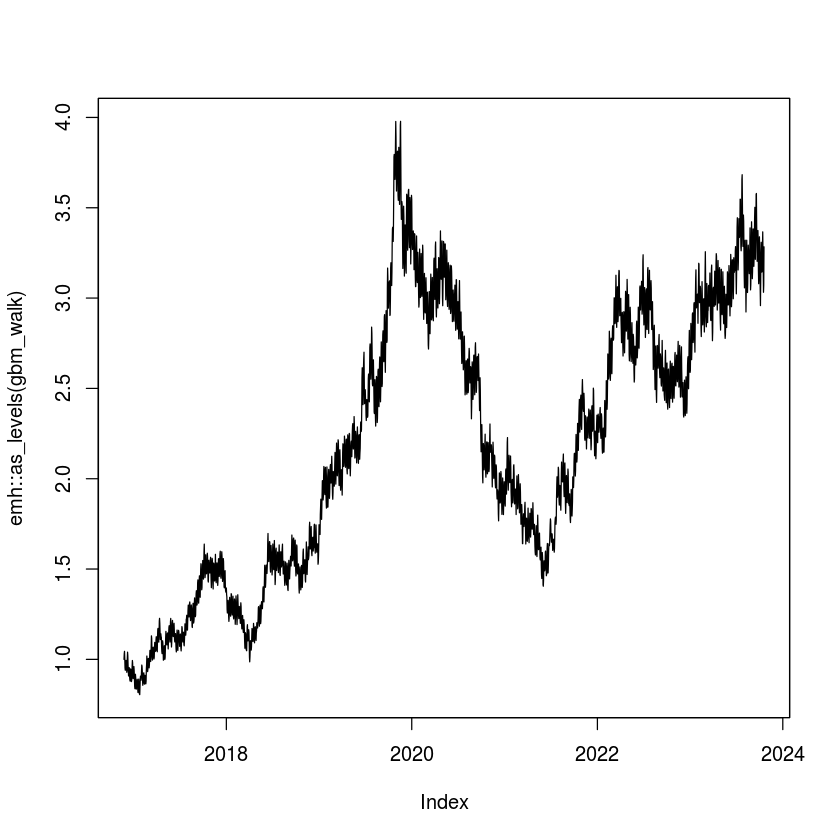

In [5]:
# Let's simulate a simple noisy sin wave random walk.
dates <- seq.Date(Sys.Date(), Sys.Date() + 2520, 1)
gbm_walk <- gbm_walk + (sin(seq(1, 2521)) / 25)
gbm_walk <- zoo::zoo(gbm_walk, dates)
plot(emh::as_levels(gbm_walk))

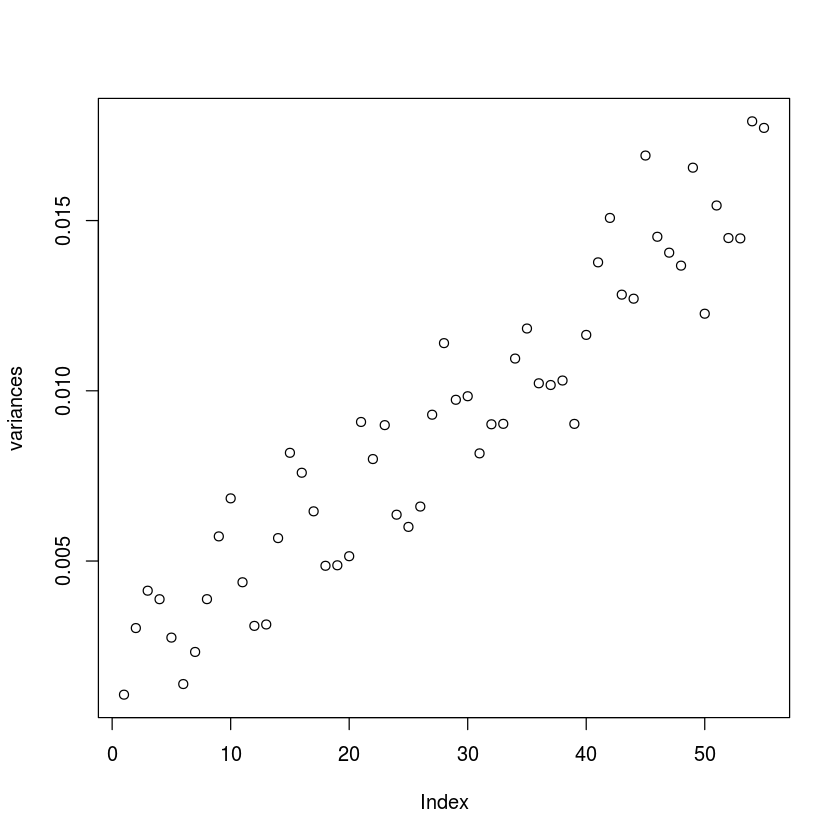

In [6]:
# Now let's print it's variance at different frequencies.
variances <- c()
for(i in 1:55) {
    suppressWarnings(variances <- c(variances,
                                    var(emh::as_frequency(gbm_walk, i)))) 
}
plot(variances)

## [The Bartel Variance Ratio Test](https://www.rdocumentation.org/packages/randtests/versions/1.0/topics/bartels.rank.test)

In 1941 John Von Neumann introduced a test of randomness based on the ratios of variances computed at different sampling intervals. The Von Neumann Ratio Test, is a very good test of randomness under the assumption of _normality_. 

In 1982 Robert Bartell create a nonparametric, rank-based version of the Von Neumann Ratio Test which doesn't assume that the data is normally distributed,

$RVN = \frac{\sum^{n-1}_{i=1}(\mathcal{R}_{i} -\mathcal{R}_{i-1})^2}{\sum^{n}_{i=1} (\mathcal{R}_{i} - (n + 1) / 2)^2}$

where $\mathcal{R}_i$ is the the rank of the logarithmic return $r_{i}$ and $n$ is the length of the time series. Bartell proved that the statistic, $\frac{RVN - 2}{\sigma}$, is _asymptotically standard normal_ with,

$\sigma^2 = \frac{4(n-2)(5n^2 - 2n - 9)}{5n(n+1)(n-1)^2}$

## [The Lo-MacKinlay Variance Ratio Test](http://www.turingfinance.com/stock-market-prices-do-not-follow-random-walks/)

The Lo-MacKinlay Variance Ratio Test was first introduced in 1987 in a paper entitled "Stock Market Prices Do Not Follow Random Walks". The test is a _parametric_ variance ratio test which works for all random walk models with finite variances,

Our data plus an interval, $q$,

* Given a log price process $X$ and lag $q$
* Compute $\mu$ for $X$ (drift) 

Now compute the variance estimates of $X$ given $q$

* Compute $\sigma^2(q)$ for $X$ with overlaps, $\sigma^2_{a}(q)$
* Compute $\sigma^2$ for $X$ without overlaps, $\sigma^2_{c}$

Now $\sigma^2_{a}(q)$ and $\sigma^2_{c}$ should be approximately equal in a random walk, 

* Compute the variance ratio $\hat{M}_{r}(q)$ statistic, $\hat{M}_{r}(q) = \frac{\sigma^2_{a}(q)}{\sigma^2_{c}} - 1$

Since $\sigma^2_{a}(q) \approx \sigma^2_{c}$, $\hat{M}_{r}(q) \approx 0$ for a random walk

* Then, compute something called the asymptotic variance, $\hat{\theta}$
* And lastly, compute the test statistic, $Z^*$, by standardizing $\sqrt{nq}\hat{M}_{r}(q)$ by $\hat{\theta}$, $Z^* = \frac{\sqrt{nq}\hat{M}_{r}(q)}{\hat{\theta}}$

The test is extremely sensitive to deviations in $\hat{M}_{r}(q)$ from 0 which makes it a very powerful test of the random walk hypothesis assuming finite variances. Furthermore the test is consistent with stochastic volatility which is a well known stylized fact of market returns! Oh and $Z^*$ is asymptotically standard normal!

At this stage you may be wondering ... what is the asymptotic variance because the above overview of the Lo-MacKinlay variance ratio test went something like this,

![A Miracle Happens](http://www.turingfinance.com/wp-content/uploads/2016/02/Scientific-Assumptions.jpg "A Miracle Happens")

The asymptotic variance, $\hat{\theta}$, here refers to the variance of $\hat{M}_{r}(q)$ when the sample size approaches _infinity_. In other words it is the limit of the variance of $\hat{M}_{r}(q)$. It's somewhat tricky to calculate - as it requires two calculations - but here it is,

$\hat{\delta}(j) = \frac{nq \sum^{nq}_{k = j + 1} \big(X_{k} -X_{k-1} - \hat{\mu} \big)^2 \big(X_{k-j} -X_{k-j-1} - \hat{\mu}\big)^2}{\Bigg[ \sum^{nq}_{k=1} \big( X_{k} -X_{k-1} - \hat{\mu} \big)^2 \Bigg]^2}$

$\hat{\theta}(q) \equiv \sum^{q-1}_{j=1} \Big[ \frac{2(q-j)}{q} \Big]^2\hat{\delta}(j)$

The good news is that I took the time to code and test this really cool randomness test in the emh package, so you don't have to worry about the stuff I just told you :-).

# RESULTS ON THE MARKET

In [7]:
suppressMessages(library(Quandl))
Quandl.api_key("t6Rn1d5N1W6Qt4jJq_zC")
suppressMessages(library(PerformanceAnalytics))

## Benchmark 1, [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion)

Geometric Brownian Motion is a very popular stochastic process used in all areas of finance. The stochastic differential equation (SDE) for GBM is given below and the R code for simulating it is included in emh,

$dS_t = \mu S_t dt + \sigma S_t dW_t$ 

where $dW_t$ is a [Wiener Process](https://en.wikipedia.org/wiki/Wiener_process), $\mu$ is the annualized rate of return, $\sigma$ is the annualized volatility, and $dt$ is the rate of change of time (for daily this is $\frac{1}{252}$)

In [8]:
gbm_walk <- emh::simulate_brownian_motion(drift = 0.1, n = 3780)
dates <- seq.Date(Sys.Date(), Sys.Date() + 3779, 1)
gbm_walk <- emh::as_levels(zoo::zoo(gbm_walk, dates))

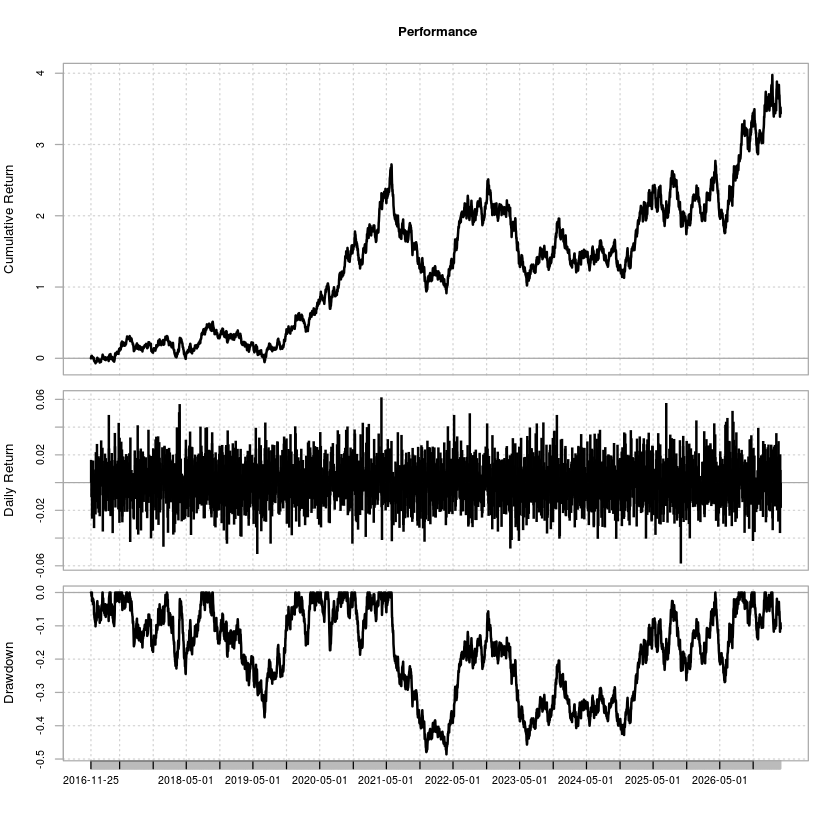

In [9]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(gbm_walk))

In [10]:
df_gbm_walk <- emh::is_random(gbm_walk, a = 0.9999,
                              freqs1  = seq(1, 20),
                              freqs2 = c("Mon", "Tue", "Wed", 
                                         "Thu", "Fri", "Week"))

  |======================================================================| 100%

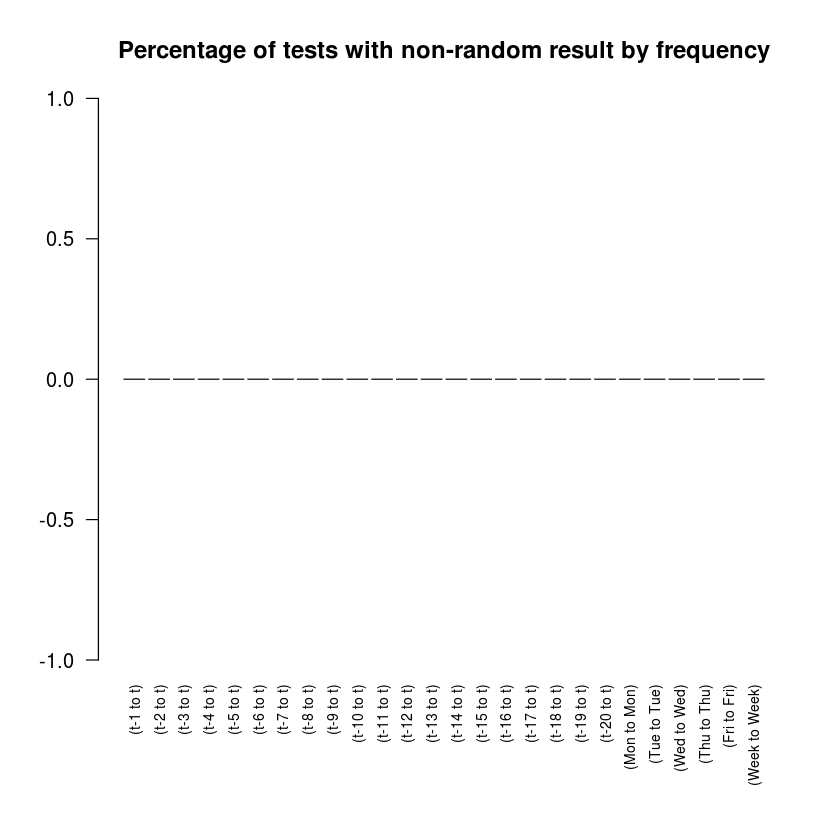

In [11]:
emh:::.plot_results_frequency(df_gbm_walk)

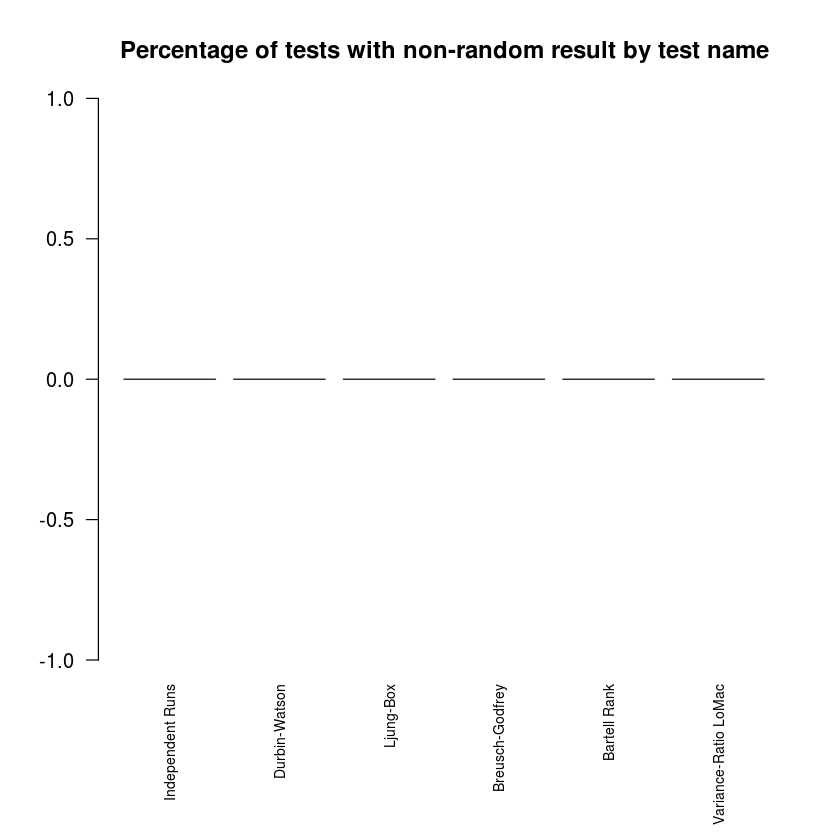

In [12]:
emh:::.plot_results_test_name(df_gbm_walk)

## Benchmark 2, [Merton Jump Diffusion Model](https://en.wikipedia.org/wiki/Jump_diffusion)

The Merton Jump Diffusion Model is another popular stochastic process which combines the Geometric Brownian Motion process is a [Poisson Process](https://en.wikipedia.org/wiki/Poisson_point_process) which is used to add _discontinuities_ a.k.a jumps a.k.a stock market crashes to the time series through time,

$d S_t = \mu S_t dt + \sigma S_t dW_t + d J_t$

where $J_t$ is the jump component given by,

$d J_t = S_t d \big( \sum^{N_t}_{i=0} (Y_i - 1) \big)$

where $N_t$ is the Poisson process with rate $\lambda$ and $Y_i$ is a random variable which follows a log-normal distribution. The R code for simualting Jump Diffusion process is also included in the emh package. In later versions I will include calibrators as well.

In [13]:
jump_walk <- emh::simulate_merton_model(drift = 0.1, n = 3780, 
                                        jlambda = 0.4)
jump_walk <- emh::as_levels(zoo::zoo(jump_walk, dates))

In [ ]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(jump_walk))

In [ ]:
df_jump_walk <- emh::is_random(jump_walk, a = 0.9999,
                               freqs1  = seq(1, 20),
                               freqs2 = c("Mon", "Tue", "Wed",
                                          "Thu", "Fri", "Week"))

In [ ]:
emh:::.plot_results_frequency(df_jump_walk)

In [ ]:
emh:::.plot_results_test_name(df_jump_walk)

## Our Volatile Currency

In [ ]:
usdzar <- Quandl("CURRFX/USDZAR", type = "zoo")$Rate

In [ ]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(usdzar))

In [ ]:
df_usdzar <- emh::is_random(usdzar, a = 0.9999,
                            freqs1  = seq(1, 20),
                            freqs2 = c("Mon", "Tue", "Wed",
                                       "Thu", "Fri", "Week"))

In [ ]:
emh:::.plot_results_frequency(df_usdzar)

In [ ]:
emh:::.plot_results_test_name(df_usdzar)

## The SATRIX Top 40

In [ ]:
stx40 <- Quandl("GOOG/JSE_STX40", 
                type = "zoo")$Close

In [ ]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(stx40))

In [ ]:
df_stx40 <- emh::is_random(stx40, a = 0.9999,
                           freqs1  = seq(1, 20),
                           freqs2 = c("Mon", "Tue", "Wed", 
                                      "Thu", "Fri", "Week"))

In [ ]:
emh:::.plot_results_frequency(df_stx40)

In [ ]:
emh:::.plot_results_test_name(df_stx40)

## The SATRIX Financials Index

In [ ]:
stxfin <- Quandl("GOOG/JSE_STXFIN", 
                 type = "zoo")$Close

In [ ]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(stxfin))

In [ ]:
df_stxfin <- emh::is_random(stxfin, a = 0.9999,
                            freqs1  = seq(1, 20),
                            freqs2 = c("Mon", "Tue", "Wed",
                                       "Thu", "Fri", "Week"))

In [ ]:
emh:::.plot_results_frequency(df_stxfin)

In [ ]:
emh:::.plot_results_test_name(df_stxfin)

## The SATRIX Financials Index Shuffled

One problem with the Lo-MacKinlay variance ratio test is that it is parametric. Meaning that there are two possible interpretations when the test fails. 

Either the market is not random or the variance of security prices is infinite and the distribution of returns is described by a [stable distribution](https://en.wikipedia.org/wiki/Stable_distribution).

A few people believe that returns are distributed according to a stable distribution. This version of the random walk hypothesis is known as the [_Stable Paretian Hypothesis_](https://web.williams.edu/Mathematics/sjmiller/public_html/341Fa09/handouts/Fama_MandelbroitAndStableParetianHypothesis.pdf) and was first proposed by Benoit Mandelbrot. If true, then most of modern quantitative finance is wrong because the following things are not possible and / or meaningful,

* Diversification and, by extension, Mean Variance Optimization
* Risk metrics based on full or partial moments (Sharpe, Sortino, etc.)
* Most derivatives are also being totally mispriced if this is true

One counter argument to it being true is that if daily returns have infinite variance then so should every other frequencies' returns because the characteristic exponent of a stable distribution is invariant in the sampling interval ... but here's a simpler test:

If the failed Lo-MacKinlay variance ratio tests are due to the distribution of returns and not because there are patterns which cause the variance ratios to deviate from one, then if I shuffle the returns I should get the same result (the market is non-random). 

Let's try it and see what happens, 

In [ ]:
stxfin_logrets <- emh::as_logreturns(stxfin)
stxfin_sim <- emh::simulate_permutation(logrets = stxfin_logrets, 
                                        window = 126)
stxfin_logrets <- head(stxfin_logrets, length(stxfin_logrets) - 14)

In [ ]:
PerformanceAnalytics::charts.PerformanceSummary(merge(exp(stxfin_logrets)-1, 
                                                      exp(stxfin_sim)-1))

In [ ]:
# Just so you believe me, here are the moments:
suppressMessages(library(moments))
for(i in seq(1, 5)) {
    print(paste(moment(stxfin_logrets, i) == 
                moment(stxfin_sim, i),
                moment(stxfin_logrets, i)))
}

In [ ]:
df_stxfin_sim <- emh::is_random(emh::as_levels(stxfin_sim), 
                                a = 0.9999,
                                freqs1  = seq(1, 20),
                                freqs2 = c("Mon", "Tue", "Wed", 
                                           "Thu", "Fri", "Week"))

In [ ]:
emh:::.plot_results_frequency(df_stxfin_sim)

In [ ]:
emh:::.plot_results_test_name(df_stxfin_sim)

# CONCLUSIONS

## All Models Are Wrong ... But Some Are Useful